# 2. Data Cleaning and Exploratory Data Analysis

In this stage we will look at the data and understand the data quality and quantity.\
This stage will give us an indication of the necessary changes that our data needs before processing to different stages.\

Points that I will be covering in this notebook:
* Data Collection
* Data Inspection and Cleaning
* Exploratory Data Analysis

This stages requires the data present in the directory: **"data\raw_data"**. \
You will need to download the data using the module in the feature pipeline: **"energy_consumption_forecasting\feature_pipeline\etl_data_extraction.py"** \
or you can run the data extraction notebook: **"notebooks\01_data_extraction.ipynb"**.

Once data is download you can follow along.

## Data Collection

In [1]:
import os
import json
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.set_style('darkgrid')

### Importing the CSV Data as a Pandas DataFrame

In [2]:
# Changing the working directory to project directory
NOTEBOOK_DIR_PATH = Path('D:/projects/energy-consumption-forecasting/notebooks')

if Path(os.getcwd()) == NOTEBOOK_DIR_PATH:
    os.chdir(path='..')

os.getcwd()

'd:\\projects\\energy-consumption-forecasting'

In [3]:
# Getting the raw data directory and all the files in it
RAW_DATA_DIR = Path('data/raw_data/')

file_list = list(RAW_DATA_DIR.iterdir())
file_list

[WindowsPath('data/raw_data/ConsumptionIndustry_2021-01-01T00-00_2021-07-01T00-00.csv'),
 WindowsPath('data/raw_data/ConsumptionIndustry_2021-07-01T00-00_2022-01-01T00-00.csv'),
 WindowsPath('data/raw_data/ConsumptionIndustry_2022-01-01T00-00_2022-07-01T00-00.csv'),
 WindowsPath('data/raw_data/ConsumptionIndustry_2022-07-01T00-00_2023-01-01T00-00.csv'),
 WindowsPath('data/raw_data/ConsumptionIndustry_2023-01-01T00-00_2023-07-01T00-00.csv'),
 WindowsPath('data/raw_data/ConsumptionIndustry_2023-07-01T00-00_2024-01-01T00-00.csv'),
 WindowsPath('data/raw_data/ConsumptionIndustry_metadata.json')]

In [4]:
dataset_filepath = file_list[-2]
metadata_filepath = file_list[-1]

# Reading the csv file as a DataFrame and metadata as a json/dict type
dataset_df = pd.read_csv(dataset_filepath)

with open(metadata_filepath) as f:
    metadata = json.load(f)

In [5]:
dataset_df.head(n=10)

,HourUTC,HourDK,MunicipalityNo,Branche,ConsumptionkWh
0,2023-06-30T22:00:00,2023-07-01T00:00:00,250,Offentligt,1361.189
1,2023-06-30T22:00:00,2023-07-01T00:00:00,773,Erhverv,7812.050
2,2023-06-30T22:00:00,2023-07-01T00:00:00,766,Privat,6760.285
3,2023-06-30T22:00:00,2023-07-01T00:00:00,219,Offentligt,2146.785
4,2023-06-30T22:00:00,2023-07-01T00:00:00,326,Erhverv,72003.364
5,2023-06-30T22:00:00,2023-07-01T00:00:00,860,Offentligt,2728.047
6,2023-06-30T22:00:00,2023-07-01T00:00:00,420,Privat,5107.485
7,2023-06-30T22:00:00,2023-07-01T00:00:00,175,Privat,3723.213
8,2023-06-30T22:00:00,2023-07-01T00:00:00,820,Privat,4829.920
9,2023-06-30T22:00:00,2023-07-01T00:00:00,575,Erhverv,22421.024


In [6]:
dataset_df.tail(n=10)

,HourUTC,HourDK,MunicipalityNo,Branche,ConsumptionkWh
1296236,2023-12-31T22:00:00,2023-12-31T23:00:00,185,Privat,8195.067
1296237,2023-12-31T22:00:00,2023-12-31T23:00:00,846,Privat,10586.162
1296238,2023-12-31T22:00:00,2023-12-31T23:00:00,461,Erhverv,119000.967
1296239,2023-12-31T22:00:00,2023-12-31T23:00:00,157,Offentligt,3065.870
1296240,2023-12-31T22:00:00,2023-12-31T23:00:00,760,Offentligt,1258.017
1296241,2023-12-31T22:00:00,2023-12-31T23:00:00,340,Erhverv,4959.924
1296242,2023-12-31T22:00:00,2023-12-31T23:00:00,575,Erhverv,28057.151
1296243,2023-12-31T22:00:00,2023-12-31T23:00:00,360,Erhverv,21953.325
1296244,2023-12-31T22:00:00,2023-12-31T23:00:00,706,Privat,17318.331
1296245,2023-12-31T22:00:00,2023-12-31T23:00:00,741,Privat,2037.005


In [7]:
metadata

{'datasetId': 18,
 'datasetName': 'ConsumptionIndustry',
 'title': 'Consumption per Industry, Public and Private, Municipality and Hour',
 'description': 'Hourly consumption of industries, public sector and private units by municipality code.',
 'organizationName': 'tso-electricity',
 'updateFrequency': 'P1D',
 'comment': "* Categories are created based on Statistics Denmark's DK10 Industry Codes:\n* \\- The category 9 ('Offentlig, undervisning og sundhed') is labeled 'Offentligt' (public).\n* \\- Units connected to a CVR number in the other of Statistics Denmark's categories, including category 11 ('Uoplyst aktivitet') are labeled 'Erhverv' (industry).\n* \\- Other units (without CVR numbers) are labeled as 'Privat' (private).\n\nUpdated gradually since 2021.  ",
 'filterColumn': 'HourUTC',
 'author': 'Energinet',
 'resolution': '1 hour (PT1H)',
 'columns': [{'dbColumn': 'HourUTC',
   'dataType': 'datetime',
   'sortOrder': 1,
   'primaryKeyIndex': 1,
   'displayName': 'Hour UTC',
   

Shape of the dataset

In [8]:
print(f'Dataset shape: {dataset_df.shape}\nDataset features: {list(dataset_df.columns)}')

Dataset shape: (1296246, 5)
Dataset features: ['HourUTC', 'HourDK', 'MunicipalityNo', 'Branche', 'ConsumptionkWh']


### Dataset Information:

There are 5 features and 1296246 data in total for a period of 6 months.
* **HourUTC:** A datetime column in UTC format. Format is in "%Y-%m-%dT%H:%M:%S"
* **HourDK:** A datetime column in Danish Timezone format. Format is in "%Y-%m-%dT%H:%M:%S"
* **MunicipalityNo:** A total of 98 municipality number are present ranging in between of 101 and 860.
* **Branche:** All the categories are grouped in three branch: 1. Erhverv, 2. Offentligt and 3. Privat.
* **ConsumptionkWh:** Electricity consumption in kilowatt-hour.

## Data Inspection and Cleaning

### Missing Value

In [9]:
dataset_df.isna().sum()

HourUTC           0
HourDK            0
MunicipalityNo    0
Branche           0
ConsumptionkWh    0
dtype: int64

### Duplicates

In [10]:
dataset_df.duplicated().sum()

0

### Data Types

In [11]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296246 entries, 0 to 1296245
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   HourUTC         1296246 non-null  object 
 1   HourDK          1296246 non-null  object 
 2   MunicipalityNo  1296246 non-null  int64  
 3   Branche         1296246 non-null  object 
 4   ConsumptionkWh  1296246 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 49.4+ MB


Fixing the data types before moving forward

In [12]:
dataset_df['HourUTC'] = pd.to_datetime(dataset_df['HourUTC'], format='%Y-%m-%dT%H:%M:%S')
dataset_df['HourDK'] = pd.to_datetime(dataset_df['HourDK'], format='%Y-%m-%dT%H:%M:%S')
dataset_df['Branche'] = dataset_df['Branche'].astype('category')
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296246 entries, 0 to 1296245
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   HourUTC         1296246 non-null  datetime64[ns]
 1   HourDK          1296246 non-null  datetime64[ns]
 2   MunicipalityNo  1296246 non-null  int64         
 3   Branche         1296246 non-null  category      
 4   ConsumptionkWh  1296246 non-null  float64       
dtypes: category(1), datetime64[ns](2), float64(1), int64(1)
memory usage: 40.8 MB


### Statistic

In [13]:
dataset_df.describe().map(lambda x: f'{x:.2f}' if type(x) == float else x)

,HourUTC,HourDK,MunicipalityNo,ConsumptionkWh
count,1296246,1296246,1296246.00,1296246.00
mean,2023-09-30 22:01:21.651168,2023-09-30 23:40:29.122249728,462.17,13002.65
min,2023-06-30 22:00:00,2023-07-01 00:00:00,101.00,27.69
25%,2023-08-15 20:00:00,2023-08-15 22:00:00,240.00,2080.15
50%,2023-10-01 02:00:00,2023-10-01 04:00:00,435.00,6825.54
75%,2023-11-16 00:00:00,2023-11-16 01:00:00,706.00,15093.01
max,2023-12-31 22:00:00,2023-12-31 23:00:00,860.00,431793.87
std,nan,nan,235.35,21487.26


In [14]:
dataset_df.describe(include='category')

,Branche
count,1296246
unique,3
top,Erhverv
freq,432866


In [15]:
dataset_df.Branche.unique()

['Offentligt', 'Erhverv', 'Privat']
Categories (3, object): ['Erhverv', 'Offentligt', 'Privat']

In [16]:
dataset_df.Branche.value_counts()

Branche
Erhverv       432866
Privat        432866
Offentligt    430514
Name: count, dtype: int64

In [17]:
print(f'Municipality Numbers:\n{dataset_df.MunicipalityNo.unique()}\n')
print(f'Total unique numbers are: {len(dataset_df.MunicipalityNo.unique())}')

Municipality Numbers:
[250 773 766 219 326 860 420 175 820 575 240 849 573 492 665 187 482 223
 329 201 410 161 756 101 540 390 813 185 306 336 147 159 450 269 340 787
 707 630 710 479 265 825 173 563 360 163 791 270 740 400 217 657 607 440
 253 510 151 741 779 751 376 727 350 561 330 167 840 190 480 370 210 430
 760 621 316 183 706 671 810 153 580 230 169 461 165 661 155 730 157 615
 260 530 746 550 846 259 851 320]

Total unique numbers are: 98


In [18]:
dataset_df['MunicipalityNo'].value_counts()

MunicipalityNo
250    13227
621    13227
430    13227
210    13227
370    13227
480    13227
190    13227
840    13227
167    13227
330    13227
561    13227
350    13227
727    13227
376    13227
751    13227
779    13227
741    13227
151    13227
510    13227
253    13227
440    13227
607    13227
657    13227
760    13227
316    13227
773    13227
183    13227
851    13227
259    13227
846    13227
550    13227
746    13227
530    13227
260    13227
615    13227
157    13227
730    13227
155    13227
661    13227
165    13227
461    13227
169    13227
230    13227
580    13227
153    13227
810    13227
671    13227
706    13227
217    13227
400    13227
740    13227
270    13227
756    13227
161    13227
410    13227
201    13227
329    13227
223    13227
482    13227
187    13227
665    13227
492    13227
573    13227
849    13227
240    13227
575    13227
820    13227
175    13227
420    13227
860    13227
326    13227
219    13227
766    13227
101    13227
540    13227
390    132

The statistic does not help much in Municipality Number because it is like an id representation for different geography sectors, which makes it a nominal categorical data. \
The HourUTC and HourDK show the period of the dataset which is between 1st July 2023 and 31st Dec 2023. \
The Branche feature has 3 unique data, which is mentioned in the metadata. All three categories have almost equal amount of data. \
Finally, the target feature ConsumptionkWh has a median 6826 while the max value is 431794, which indicates positive skewness and outliers.

### Transforming the Dataset (Feature Engineering)

In [19]:
# Dropping UTC datetime column because we have denmark datetime column
dataset_df.drop(columns=['HourUTC'], inplace=True)

In [20]:
# Renaming the columns
new_columns = {'HourDK': 'datetime_dk', 
               'MunicipalityNo': 'municipality_num', 
               'Branche': 'branch', 
               'ConsumptionkWh': 'consumption_kwh'}

dataset_df.rename(columns=new_columns, inplace=True)
dataset_df.columns

Index(['datetime_dk', 'municipality_num', 'branch', 'consumption_kwh'], dtype='object')

In [21]:
# Sorting the dataset
dataset_df.sort_values(by=['branch', 'municipality_num', 'datetime_dk'], inplace=True)

In [22]:
# Translating the branch categories from Danish to English
new_branch_categories = {'Offentligt': 'public',
                         'Erhverv': 'industry',
                         'Privat': 'private'}

dataset_df['branch'] = dataset_df['branch'].cat.rename_categories(new_branch_categories)
dataset_df.head()

,datetime_dk,municipality_num,branch,consumption_kwh
134,2023-07-01 00:00:00,101,industry,135096.213
325,2023-07-01 01:00:00,101,industry,128548.462
739,2023-07-01 02:00:00,101,industry,124575.437
1082,2023-07-01 03:00:00,101,industry,123888.729
1275,2023-07-01 04:00:00,101,industry,121510.122


In [23]:
dataset_df['branch'].unique()

['industry', 'public', 'private']
Categories (3, object): ['industry', 'public', 'private']

In [24]:
# Now that we have renamed the categories, we will create another dataset that have all the features in numerical format
feature_df = dataset_df.copy()

branch_mapping = {'public': 1,
                  'industry': 2,
                  'private': 3}

feature_df['branch'] = feature_df['branch'].apply(lambda x: branch_mapping.get(x)).astype('int8')
feature_df.head()

,datetime_dk,municipality_num,branch,consumption_kwh
134,2023-07-01 00:00:00,101,2,135096.213
325,2023-07-01 01:00:00,101,2,128548.462
739,2023-07-01 02:00:00,101,2,124575.437
1082,2023-07-01 03:00:00,101,2,123888.729
1275,2023-07-01 04:00:00,101,2,121510.122


In [25]:
# Creating a new column, converting the consumption feature from kilowatt-hour to megawatt-hour
feature_df['consumption_mwh'] = feature_df['consumption_kwh'] / 1000
feature_df.head()

,datetime_dk,municipality_num,branch,consumption_kwh,consumption_mwh
134,2023-07-01 00:00:00,101,2,135096.213,135.096213
325,2023-07-01 01:00:00,101,2,128548.462,128.548462
739,2023-07-01 02:00:00,101,2,124575.437,124.575437
1082,2023-07-01 03:00:00,101,2,123888.729,123.888729
1275,2023-07-01 04:00:00,101,2,121510.122,121.510122


In [26]:
# Creating new columns based on the data present in the feature datetime_dk
feature_df['hour_dk'] = feature_df.datetime_dk.dt.hour
feature_df['dayofmonth_dk'] = feature_df.datetime_dk.dt.day
feature_df['month_dk'] = feature_df.datetime_dk.dt.month
feature_df['year_dk'] = feature_df.datetime_dk.dt.year
feature_df['dayofweek_dk'] = feature_df.datetime_dk.dt.dayofweek
feature_df['dayofyear_dk'] = feature_df.datetime_dk.dt.dayofyear
feature_df['weekofyear'] = feature_df.datetime_dk.dt.isocalendar().week
feature_df['quarter_dk'] = feature_df.datetime_dk.dt.quarter

In [27]:
feature_df.head()

,datetime_dk,municipality_num,branch,consumption_kwh,consumption_mwh,hour_dk,dayofmonth_dk,month_dk,year_dk,dayofweek_dk,dayofyear_dk,weekofyear,quarter_dk
134,2023-07-01 00:00:00,101,2,135096.213,135.096213,0,1,7,2023,5,182,26,3
325,2023-07-01 01:00:00,101,2,128548.462,128.548462,1,1,7,2023,5,182,26,3
739,2023-07-01 02:00:00,101,2,124575.437,124.575437,2,1,7,2023,5,182,26,3
1082,2023-07-01 03:00:00,101,2,123888.729,123.888729,3,1,7,2023,5,182,26,3
1275,2023-07-01 04:00:00,101,2,121510.122,121.510122,4,1,7,2023,5,182,26,3


In [28]:
feature_df.tail()

,datetime_dk,municipality_num,branch,consumption_kwh,consumption_mwh,hour_dk,dayofmonth_dk,month_dk,year_dk,dayofweek_dk,dayofyear_dk,weekofyear,quarter_dk
1294791,2023-12-31 19:00:00,860,3,27118.784,27.118784,19,31,12,2023,6,365,52,4
1295323,2023-12-31 20:00:00,860,3,23715.430,23.715430,20,31,12,2023,6,365,52,4
1295491,2023-12-31 21:00:00,860,3,21958.973,21.958973,21,31,12,2023,6,365,52,4
1295921,2023-12-31 22:00:00,860,3,20627.702,20.627702,22,31,12,2023,6,365,52,4
1296184,2023-12-31 23:00:00,860,3,19564.207,19.564207,23,31,12,2023,6,365,52,4


## Exploratory Data Analysis

In [29]:
# First looking at the corelation matrix
corr_map_df = feature_df.corr().map(lambda x: 0 if np.isnan(x) else x)
corr_map_df

,datetime_dk,municipality_num,branch,consumption_kwh,consumption_mwh,hour_dk,dayofmonth_dk,month_dk,year_dk,dayofweek_dk,dayofyear_dk,weekofyear,quarter_dk
datetime_dk,1.000000e+00,-6.222131e-13,-2.121570e-05,0.085553,0.085553,5.259311e-03,1.617409e-01,9.860639e-01,0,1.414899e-02,9.999853e-01,9.992729e-01,8.667896e-01
municipality_num,-6.222131e-13,1.000000e+00,-1.124409e-14,0.108640,0.108640,1.811173e-14,-4.701368e-15,1.004227e-14,0,1.064862e-14,-1.172695e-14,-2.366798e-14,-4.233447e-16
branch,-2.121570e-05,-1.124409e-14,1.000000e+00,0.140584,0.140584,6.919750e-07,3.566582e-03,-6.426927e-04,0,2.188717e-03,-2.121975e-05,-1.038321e-04,-2.227821e-03
consumption_kwh,8.555257e-02,1.086402e-01,1.405844e-01,1.000000,1.000000,3.124415e-02,1.125185e-02,8.465236e-02,0,-1.874504e-02,8.538422e-02,8.607655e-02,7.798066e-02
consumption_mwh,8.555257e-02,1.086402e-01,1.405844e-01,1.000000,1.000000,3.124415e-02,1.125185e-02,8.465236e-02,0,-1.874504e-02,8.538422e-02,8.607655e-02,7.798066e-02
hour_dk,5.259311e-03,1.811173e-14,6.919750e-07,0.031244,0.031244,1.000000e+00,-4.640960e-04,-9.157770e-05,0,-4.614860e-04,-1.668207e-04,-1.493715e-04,-3.106063e-04
dayofmonth_dk,1.617409e-01,-4.701368e-15,3.566582e-03,0.011252,0.011252,-4.640960e-04,1.000000e+00,-4.505128e-03,0,-1.683297e-02,1.617457e-01,1.623522e-01,3.248978e-03
month_dk,9.860639e-01,1.004227e-14,-6.426927e-04,0.084652,0.084652,-9.157770e-05,-4.505128e-03,1.000000e+00,0,1.726964e-02,9.860780e-01,9.852503e-01,8.790712e-01
year_dk,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
dayofweek_dk,1.414899e-02,1.064862e-14,2.188717e-03,-0.018745,-0.018745,-4.614860e-04,-1.683297e-02,1.726964e-02,0,1.000000e+00,1.415169e-02,-2.359719e-02,4.834881e-03


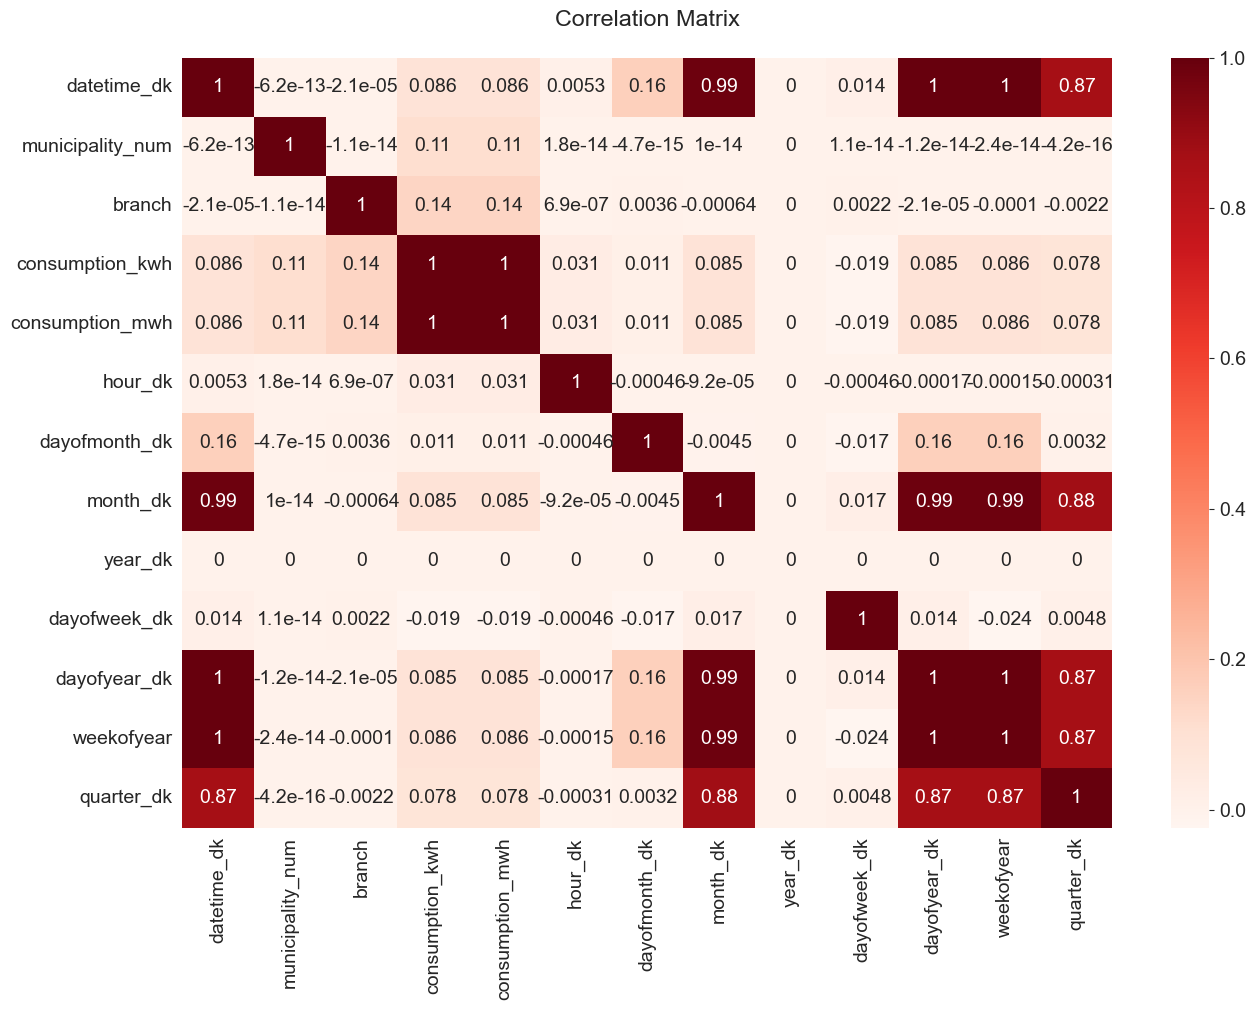

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_map_df, cmap='Reds', annot=True, )
plt.title('Correlation Matrix\n');

Municipality_num and branch have a positive correlation with consumption feature but similar to all the features they to have weak correlation. \
Only the dayofweek feature has negative correlation with the consumption feature.

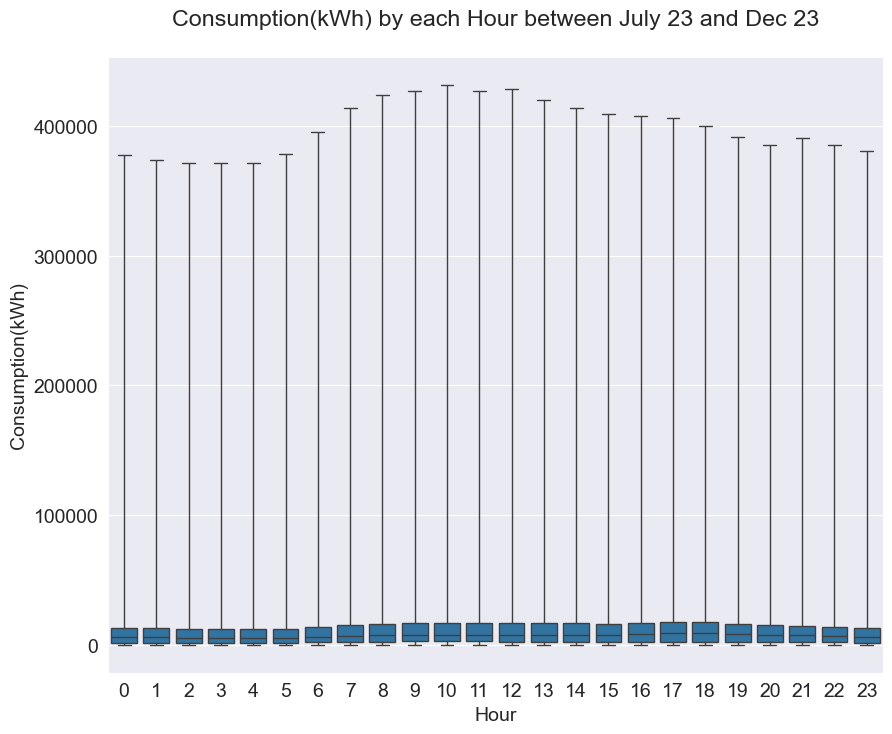

In [31]:
# Checking hourly consumption
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=feature_df, x='hour_dk', y='consumption_kwh', whis=(0, 100))
ax.set_title('Consumption(kWh) by each Hour between July 23 and Dec 23\n')
ax.set_xlabel('Hour')
ax.set_ylabel('Consumption(kWh)')
plt.show()

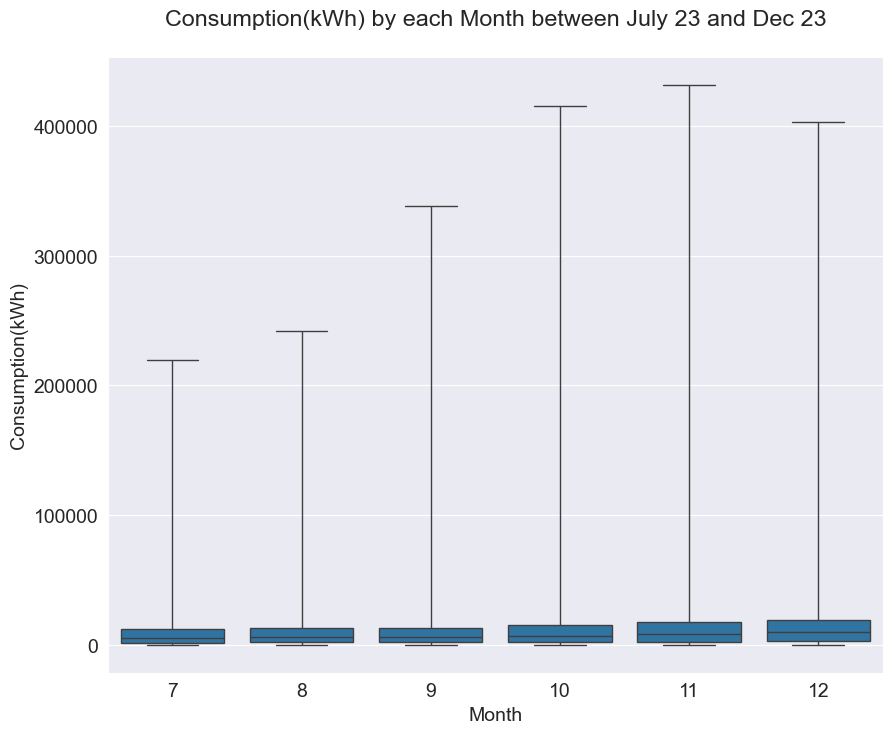

In [32]:
# Checking monthly consumption
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=feature_df, x='month_dk', y='consumption_kwh', whis=(0, 100))
ax.set_title('Consumption(kWh) by each Month between July 23 and Dec 23\n')
ax.set_xlabel('Month')
ax.set_ylabel('Consumption(kWh)')
plt.show()

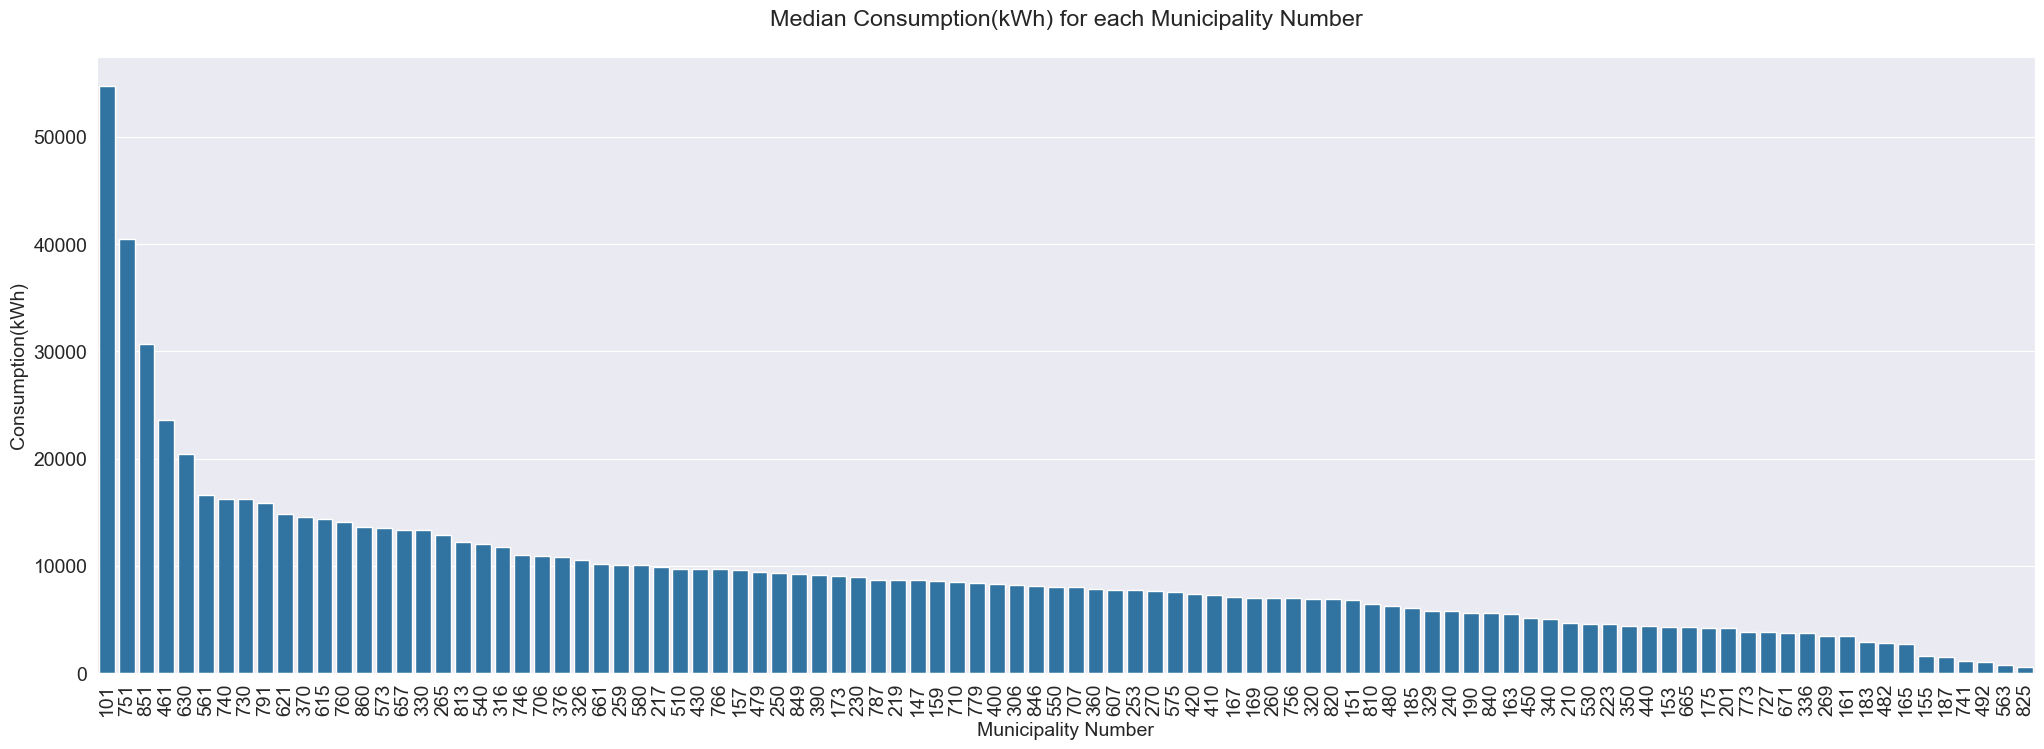

In [33]:
# Plotting using the branch feature
fig, ax = plt.subplots(figsize=(25, 8))
data = feature_df[['municipality_num', 'consumption_kwh']].groupby(by=['municipality_num']).median().sort_values('consumption_kwh', ascending=False)
sns.barplot(data=data,
              x='municipality_num',
              y='consumption_kwh',
              order=data.index)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(data.index, rotation=90)
ax.set_title('Median Consumption(kWh) for each Municipality Number\n')
ax.set_xlabel('Municipality Number')
ax.set_ylabel('Consumption(kWh)')
plt.show()

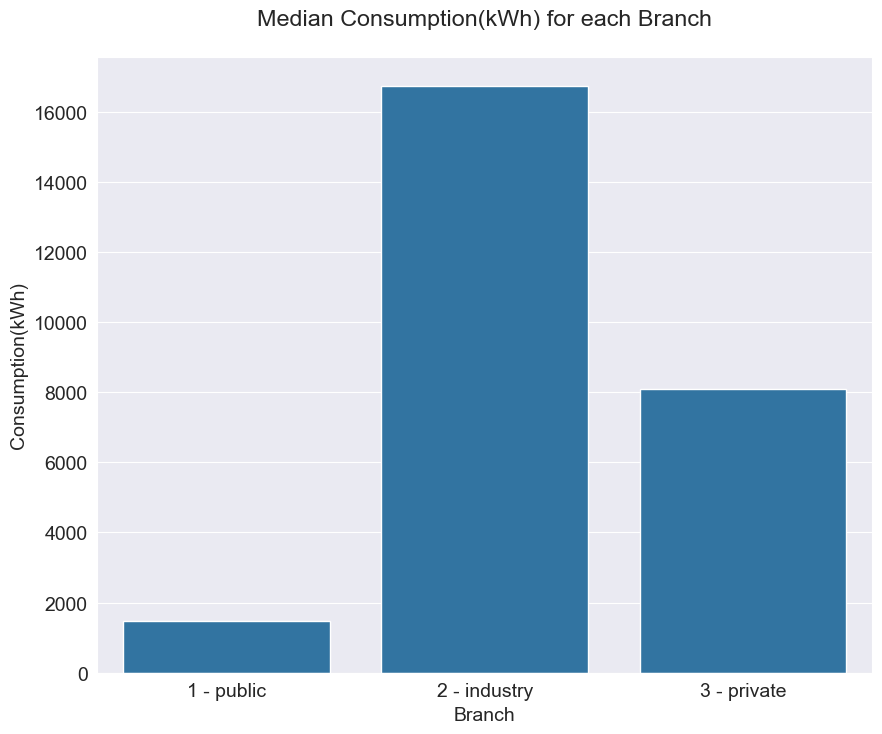

In [34]:
# Plotting using the branch feature
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=feature_df[['branch', 'consumption_kwh']].groupby(by=['branch']).median(),
              x='branch',
              y='consumption_kwh')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([f'{i[1]} - {i[0]}' for i in branch_mapping.items()])
ax.set_title('Median Consumption(kWh) for each Branch\n')
ax.set_xlabel('Branch')
ax.set_ylabel('Consumption(kWh)')
plt.show()

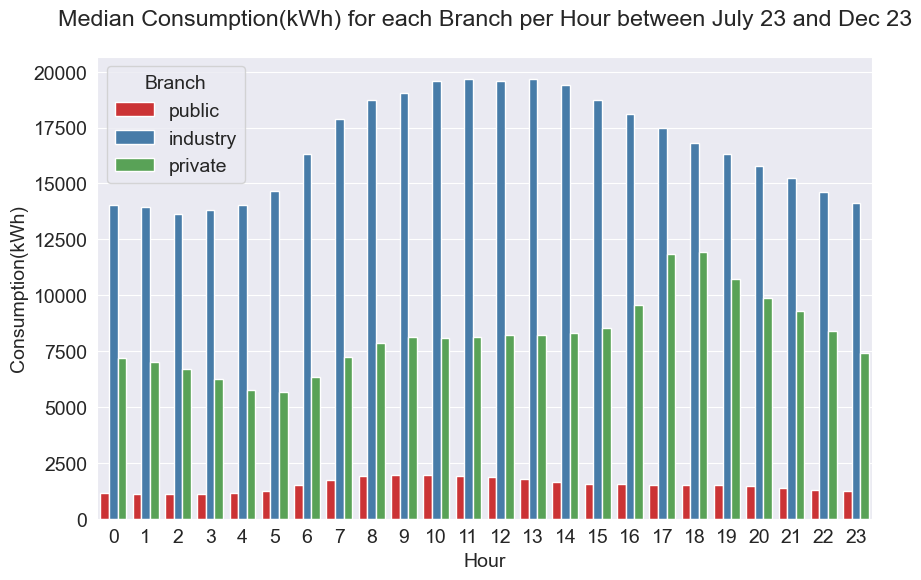

In [35]:
# Plotting using the branch feature
g = sns.barplot(data=feature_df[['branch', 'hour_dk', 'consumption_kwh']].groupby(by=['hour_dk', 'branch']).median(),
                x='hour_dk',
                y='consumption_kwh',
                hue='branch',
                palette='Set1')

legend = g.axes.get_legend()
legend.set_title('Branch')
for t, l in zip(legend.texts, list(branch_mapping.keys())):
    t.set_text(l)

g.set_title('Median Consumption(kWh) for each Branch per Hour between July 23 and Dec 23\n')
g.set_xlabel('Hour')
g.set_ylabel('Consumption(kWh)')
plt.show()